In [1]:
import pandas as pd
import numpy as np
import random as rnd

import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Analysis  
Let's take a look at the data.

In [2]:
df = pd.read_csv('/content/drive/My Drive/Machine Learning Materials/Data-Collisions.csv')

df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Clean up missing values and redundant and ID data fields.

In [3]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df.shape

(194673, 38)

In [5]:
df.loc[df['ADDRTYPE'].isnull(), 'ADDRTYPE'] = 'Unknown'
df['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley', 'Unknown'], dtype=object)

In [6]:
df.loc[df['COLLISIONTYPE'].isnull(), 'COLLISIONTYPE'] = 'Other'
df['COLLISIONTYPE'].unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'],
      dtype=object)

In [7]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [8]:
df['JUNCTIONTYPE'].unique()
df.loc[df['JUNCTIONTYPE'].isnull(), 'JUNCTIONTYPE'] = 'Unknown'

df.groupby(['UNDERINFL']).size()

df['UNDERINFL'].replace(('Y', '1', 'N', '0', np.NaN), (1, 1, 0, 0, 0), inplace=True)


df.groupby(['PEDROWNOTGRNT']).size()
df['PEDROWNOTGRNT'].replace(('Y', np.NaN), (1, 0), inplace=True)
df.groupby(['PEDROWNOTGRNT']).size()



PEDROWNOTGRNT
0    190006
1      4667
dtype: int64

In [9]:
df['HITPARKEDCAR'].replace(('Y', 'N'), (1, 0), inplace=True)
df.groupby(['HITPARKEDCAR']).size()

HITPARKEDCAR
0    187457
1      7216
dtype: int64

In [10]:
df['SEVERITYCODE'].replace((1, 2), (0, 1), inplace=True)
df.groupby(['SEVERITYCODE']).size()

SEVERITYCODE
0    136485
1     58188
dtype: int64

In [11]:
df['SPEEDING'].replace(('Y', np.NaN), (1,0), inplace=True)
df.groupby(['SPEEDING']).size()

SPEEDING
0    185340
1      9333
dtype: int64

In [12]:
df.groupby(['INATTENTIONIND']).size()
df['INATTENTIONIND'].replace(('Y', np.NaN), (1, 0), inplace=True)
df.groupby(['INATTENTIONIND']).size()

INATTENTIONIND
0    164868
1     29805
dtype: int64

In [13]:
df.groupby(['SDOT_COLCODE']).size().count()

39

In [14]:
df = df.drop(['SEVERITYCODE.1', 'INCKEY', 'EXCEPTRSNCODE', 
              'INTKEY', 'REPORTNO', 'EXCEPTRSNDESC', 'COLDETKEY', 'OBJECTID', 'SEVERITYDESC', 'INCDATE', 
              'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'ST_COLCODE', 'STATUS'], axis=1)


In [15]:
df.drop_duplicates(keep='first', inplace=True)

In [16]:
df.describe()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
count,194621.000000,189303.000000,189303.000000,194621.000000,194621.000000,194621.000000,194621.000000,194621.000000,194621.000000,194621.00000,194621.000000,194621.000000,194621.000000
mean,0.298925,-122.330518,47.619542,2.444505,0.037139,0.028389,1.920856,13.868750,0.153113,0.04686,0.023975,0.047944,0.037057
std,0.457788,0.029977,0.056157,1.345973,0.198151,0.167406,0.630951,6.867755,0.360097,0.21134,0.152971,0.213649,0.188901
min,0.000000,-122.419091,47.495573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,-122.348673,47.575956,2.000000,0.000000,0.000000,2.000000,11.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,-122.330224,47.615369,2.000000,0.000000,0.000000,2.000000,13.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,-122.311937,47.663664,3.000000,0.000000,0.000000,2.000000,14.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,-122.238949,47.734142,81.000000,6.000000,2.000000,12.000000,69.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [17]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'LOCATION', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING', 'ST_COLDESC', 'HITPARKEDCAR'], dtype=object)

In [18]:
df.corr(method='pearson', min_periods=1)

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
SEVERITYCODE,1.000000,0.010316,0.017732,0.130889,0.246308,0.214244,-0.054713,0.188858,0.046329,0.044336,0.206269,0.038967,-0.101476
X,0.010316,1.000000,-0.160291,0.012934,0.011309,-0.001768,-0.012187,0.010897,-0.015339,-0.031153,0.008384,-0.008162,-0.016510
Y,0.017732,-0.160291,1.000000,-0.013899,0.010194,0.026304,0.017078,-0.019732,0.008756,-0.006750,0.022018,-0.026601,-0.012552
PERSONCOUNT,0.130889,0.012934,-0.013899,1.000000,-0.023463,-0.038764,0.380511,-0.129009,0.077370,0.022418,-0.027453,-0.002942,-0.052761
PEDCOUNT,0.246308,0.011309,0.010194,-0.023463,1.000000,-0.016914,-0.261340,0.260395,-0.004299,0.016600,0.494593,-0.032836,-0.035258
PEDCYLCOUNT,0.214244,-0.001768,0.026304,-0.038764,-0.016914,1.000000,-0.253822,0.382487,0.004096,-0.016397,0.323752,-0.020385,-0.030179
VEHCOUNT,-0.054713,-0.012187,0.017078,0.380511,-0.261340,-0.253822,1.000000,-0.366067,0.076199,0.006581,-0.228049,-0.025748,0.048835
SDOT_COLCODE,0.188858,0.010897,-0.019732,-0.129009,0.260395,0.382487,-0.366067,1.000000,0.029439,0.106787,0.238663,0.144695,-0.095049
INATTENTIONIND,0.046329,-0.015339,0.008756,0.077370,-0.004299,0.004096,0.076199,0.029439,1.000000,-0.026020,-0.026438,-0.048868,0.011991
UNDERINFL,0.044336,-0.031153,-0.006750,0.022418,0.016600,-0.016397,0.006581,0.106787,-0.026020,1.000000,-0.017586,0.092374,0.010173


Let's get a quick count for the severity values.

In [19]:
df.groupby(['SEVERITYCODE']).size()

SEVERITYCODE
0    136444
1     58177
dtype: int64

Looks like we have an unbalanced data set. Let's do a bit more analysis of the data. First, let's see if there's some collision types appear to be more serious than others.

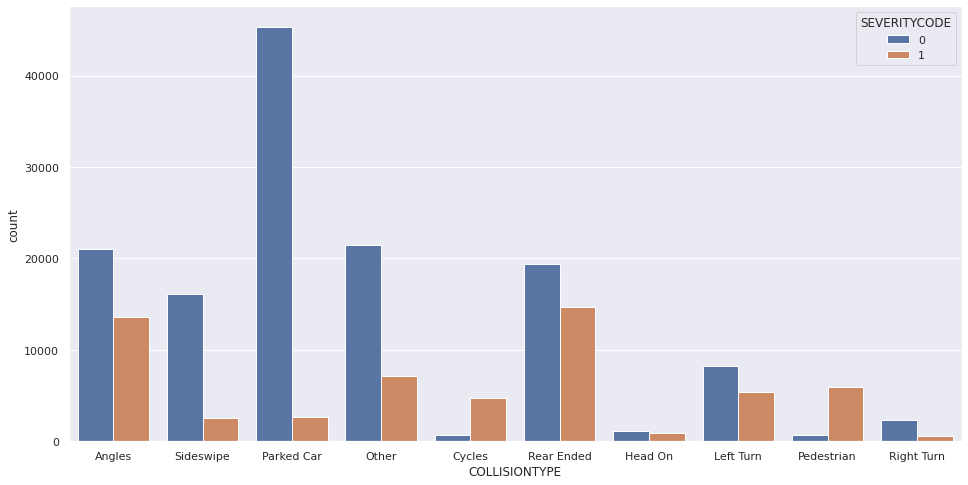

In [20]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(x='COLLISIONTYPE', hue='SEVERITYCODE', data=df)
plt.show()

Sure looks like it to me. Pedestrian and Cycles collision types are likelier than not be serious. Angles, Rear Ended, Left Turn, and Head On are also disproportionately serious, given the imbalanced data. Let's quickly plot the severity based on description code column to see if there is a disparity there.

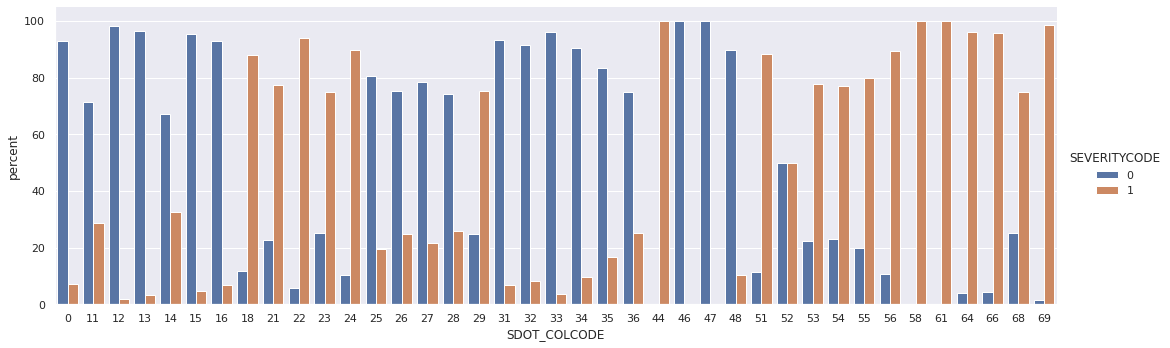

In [21]:
x, y = 'SDOT_COLCODE', 'SEVERITYCODE'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', height = 5, aspect = 3))


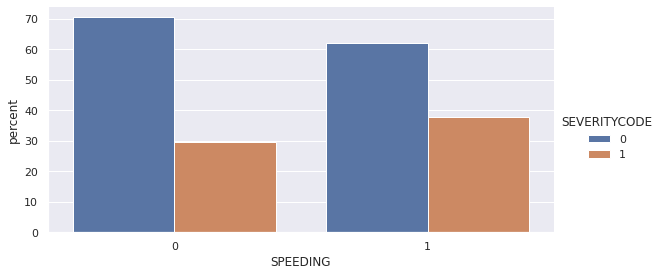

In [22]:
x, y = 'SPEEDING', 'SEVERITYCODE'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', height = 4, aspect = 2))


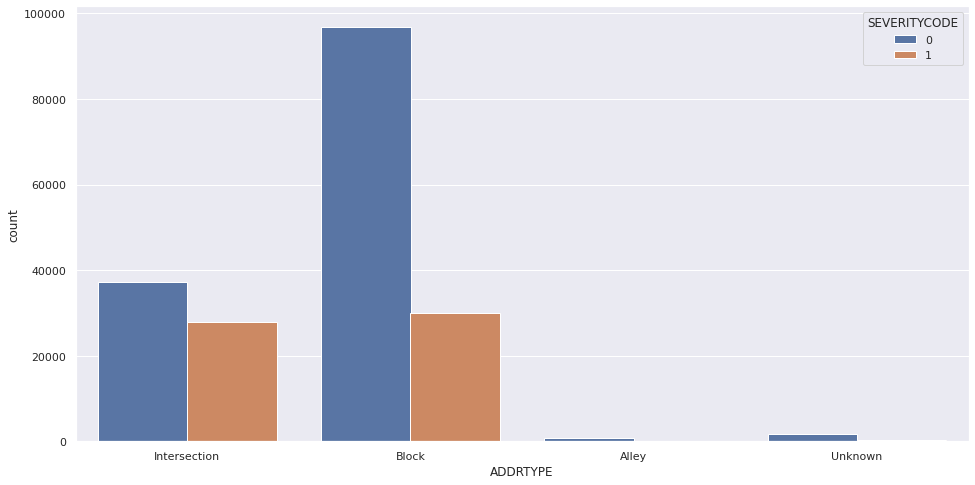

In [23]:
sns.countplot(x='ADDRTYPE', hue='SEVERITYCODE', data=df)

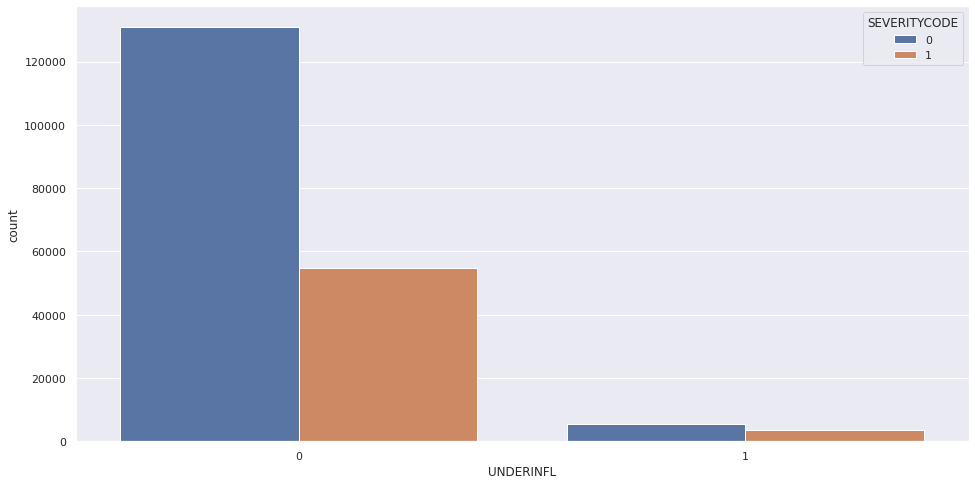

In [24]:
sns.countplot(x='UNDERINFL', hue='SEVERITYCODE', data=df)

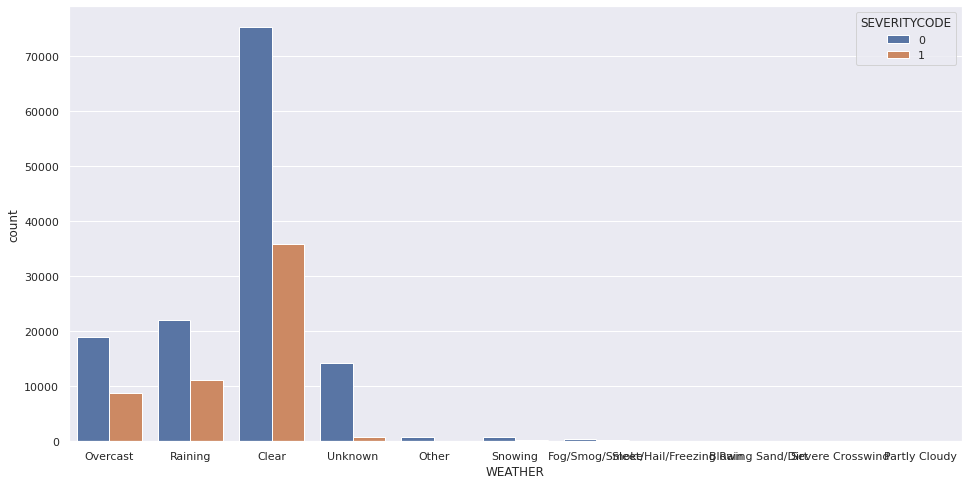

In [25]:
sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=df)

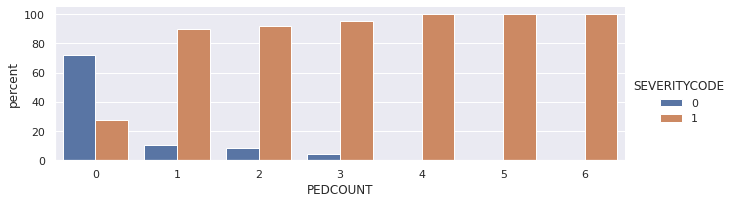

In [51]:
x, y = 'PEDCOUNT', 'SEVERITYCODE'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', height=3, aspect=3))

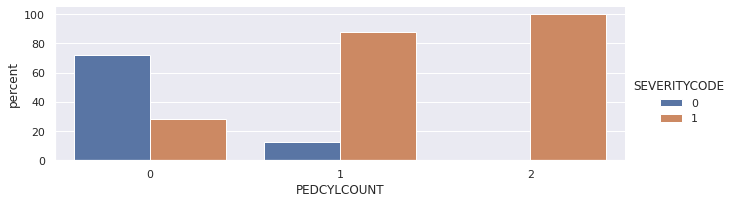

In [52]:
x, y = 'PEDCYLCOUNT', 'SEVERITYCODE'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar', height=3, aspect=3))

Let's quickly examine the data of our description fields to see if there's anything worth parsing.

In [26]:
df['SDOT_COLDESC']

0         MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...
1         MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...
2              MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END
3         MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...
4         MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...
                                ...                        
194668    MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...
194669         MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END
194670    MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...
194671    PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...
194672         MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END
Name: SDOT_COLDESC, Length: 194621, dtype: object

In [27]:
df['ST_COLDESC']

0                                         Entering at angle
1         From same direction - both going straight - bo...
2                                    One parked--one moving
3                          From same direction - all others
4                                         Entering at angle
                                ...                        
194668      From opposite direction - both moving - head-on
194669    From same direction - both going straight - bo...
194670    From opposite direction - one left turn - one ...
194671                         Vehicle Strikes Pedalcyclist
194672    From same direction - both going straight - on...
Name: ST_COLDESC, Length: 194621, dtype: object

Let's keep the SDOT_COLDESC field as it contains data that isn't captured specifically in other field. We'll also get rid of SDOT_COLCODE since it maps to SDOT_COLDESC but the latter is more readable.

In [28]:
df = df.drop(['ST_COLDESC', 'SDOT_COLCODE'], axis=1)

In [29]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,1,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Overcast,Wet,Daylight,0,0,0
1,0,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,Raining,Wet,Dark - Street Lights On,0,0,0
2,0,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,0,0,0
3,0,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,0
4,1,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Daylight,0,0,0


In [30]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

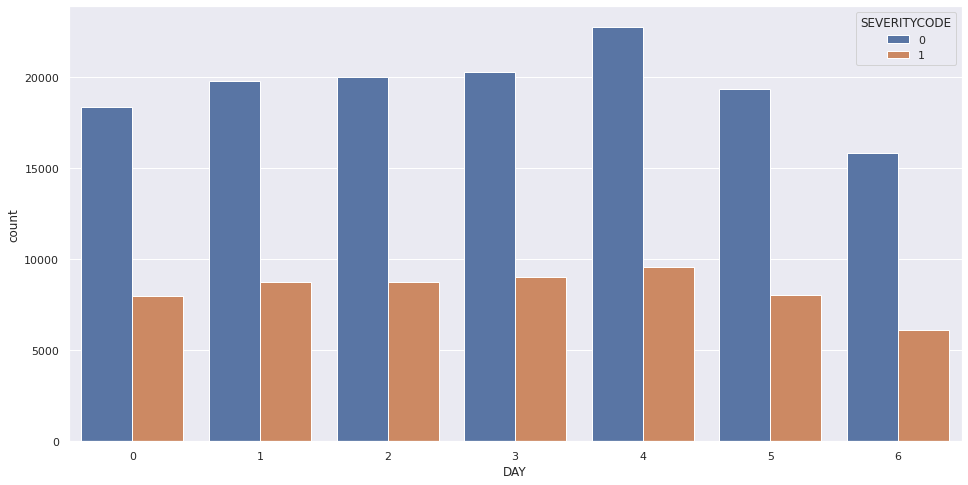

In [31]:
df['DAY'] = df['INCDTTM'].dt.dayofweek
df['DAY'].value_counts()

sns.countplot(x='DAY', hue='SEVERITYCODE', data=df)

It doesn't look like there's any kind of correlation between day of the week and accident severity. Let's check the time.

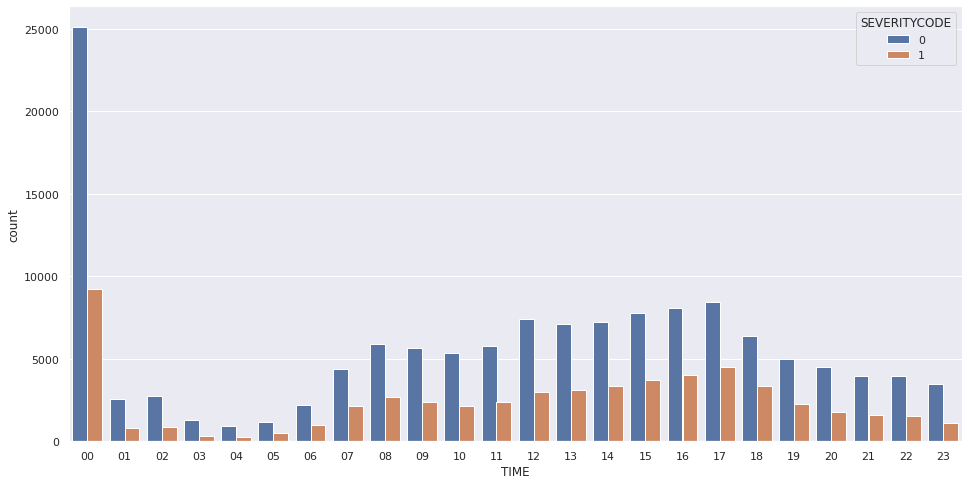

In [32]:
df['TIME'] = df['INCDTTM'].dt.strftime('%H')

sns.countplot(x='TIME', hue='SEVERITYCODE', data=df)

Hm, it doesn't look like there's a correlation here, either, and since the data contains a value for light conditions, that might serve as a more useful data point, anyhow. We can leave these out. Let's pre-process the data now.


In [33]:
df = df.drop(['X', 'Y', 'LOCATION', 'INCDTTM', 'JUNCTIONTYPE', 'DAY', 'TIME'], axis=1)
df.head()


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,1,Intersection,Angles,2,0,0,2,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Overcast,Wet,Daylight,0,0,0
1,0,Block,Sideswipe,2,0,0,2,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,Raining,Wet,Dark - Street Lights On,0,0,0
2,0,Block,Parked Car,4,0,0,3,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,0,0,0
3,0,Block,Other,3,0,0,3,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,0
4,1,Intersection,Angles,2,0,0,2,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Daylight,0,0,0


I see that there is both a feature for 'HITPARKEDCAR', as well as a parked car accident type. If there is a high correlation between these two, I can remove one.

In [34]:
df = pd.get_dummies(df, columns=['COLLISIONTYPE'])

df.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
0,1,Intersection,2,0,0,2,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Overcast,Wet,Daylight,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,Block,2,0,0,2,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,Block,4,0,0,3,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,0,Overcast,Dry,Daylight,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,Block,3,0,0,3,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Clear,Dry,Daylight,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,Intersection,2,0,0,2,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,Raining,Wet,Daylight,0,0,0,1,0,0,0,0,0,0,0,0,0


In [35]:
df.corr(method='pearson', min_periods=1)

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
SEVERITYCODE,1.000000,0.130889,0.246308,0.214244,-0.054713,0.046329,0.044336,0.206269,0.038967,-0.101476,0.095577,0.213298,0.029538,0.057715,-0.044299,-0.304163,0.245409,0.132352,-0.025203,-0.116652
PERSONCOUNT,0.130889,1.000000,-0.023463,-0.038764,0.380511,0.077370,0.022418,-0.027453,-0.002942,-0.052761,0.092516,-0.039631,0.021875,0.053152,-0.192085,-0.089349,-0.037344,0.139328,0.025003,0.042726
PEDCOUNT,0.246308,-0.023463,1.000000,-0.016914,-0.261340,-0.004299,0.016600,0.494593,-0.032836,-0.035258,-0.083194,-0.016248,-0.019214,-0.049348,-0.072587,-0.102858,0.946493,-0.084513,-0.022216,-0.059352
PEDCYLCOUNT,0.214244,-0.038764,-0.016914,1.000000,-0.253822,0.004096,-0.016397,0.323752,-0.020385,-0.030179,-0.077587,0.987660,-0.017082,-0.044987,-0.068386,-0.096556,-0.031109,-0.077567,-0.020307,-0.054614
VEHCOUNT,-0.054713,0.380511,-0.261340,-0.253822,1.000000,0.076199,0.006581,-0.228049,-0.025748,0.048835,0.114374,-0.252801,0.033489,0.057152,-0.474542,0.204185,-0.269344,0.219975,0.020438,0.076426
INATTENTIONIND,0.046329,0.077370,-0.004299,0.004096,0.076199,1.000000,-0.026020,-0.026438,-0.048868,0.011991,-0.066544,0.004096,-0.011801,-0.052811,-0.063581,-0.034116,-0.004213,0.204986,0.002613,-0.002571
UNDERINFL,0.044336,0.022418,0.016600,-0.016397,0.006581,-0.026020,1.000000,-0.017586,0.092374,0.010173,-0.040770,-0.016509,0.023284,-0.033362,0.088169,0.018631,0.015634,-0.013050,-0.019585,-0.034803
PEDROWNOTGRNT,0.206269,-0.027453,0.494593,0.323752,-0.228049,-0.026438,-0.017586,1.000000,-0.028411,-0.030745,-0.071475,0.325447,-0.016067,-0.041161,-0.064382,-0.089556,0.507809,-0.072123,-0.019189,-0.050387
SPEEDING,0.038967,-0.002942,-0.032836,-0.020385,-0.025748,-0.048868,0.092374,-0.028411,1.000000,-0.028362,-0.035904,-0.020552,0.049775,-0.040132,0.161190,-0.055736,-0.035025,0.022341,-0.020396,-0.035259
HITPARKEDCAR,-0.101476,-0.052761,-0.035258,-0.030179,0.048835,0.011991,0.010173,-0.030745,-0.028362,1.000000,-0.089696,-0.030368,-0.016893,-0.053240,-0.052298,0.307097,-0.036320,-0.086877,-0.023250,-0.056937


Doesn't look like it. Let's continue on with our pre-processing.

In [36]:
df.head()

df = pd.get_dummies(df, columns=['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SDOT_COLDESC'])

In [37]:
df_park = df[['SEVERITYCODE', 'HITPARKEDCAR', 'COLLISIONTYPE_Parked Car']]
df_park.corr(method='pearson', min_periods=1)

df = df.drop(['HITPARKEDCAR'], axis=1)


In [38]:
df_ped = df[['SEVERITYCODE', 'PEDCOUNT', 'COLLISIONTYPE_Pedestrian']]
df_ped.corr(method='pearson', min_periods=1)
df = df.drop(['COLLISIONTYPE_Pedestrian'], axis=1)

In [39]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 20))

Top Absolute Correlations
PEDCYLCOUNT                                                          COLLISIONTYPE_Cycles                                                  0.987660
ADDRTYPE_Block                                                       ADDRTYPE_Intersection                                                 0.970016
PEDCOUNT                                                             SDOT_COLDESC_MOTOR VEHCILE STRUCK PEDESTRIAN                          0.913476
WEATHER_Unknown                                                      ROADCOND_Unknown                                                      0.894020
WEATHER_Raining                                                      ROADCOND_Wet                                                          0.767934
WEATHER_Clear                                                        ROADCOND_Dry                                                          0.757939
ROADCOND_Dry                                                         ROADCOND_Wet     

In [40]:
df_ped = df[['SEVERITYCODE', 'PEDCOUNT', 'SDOT_COLDESC_MOTOR VEHCILE STRUCK PEDESTRIAN']]
df_ped.corr(method='pearson', min_periods=1)
df = df.drop(['SDOT_COLDESC_MOTOR VEHCILE STRUCK PEDESTRIAN'], axis=1)

In [41]:
df_cycles = df[['SEVERITYCODE', 'COLLISIONTYPE_Rear Ended', 'SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END']]
df_cycles.corr(method='pearson', min_periods=1)
#df = df.drop(['COLLISIONTYPE_Cycles'], axis=1)
#df = df.drop(['SDOT_COLDESC_MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE'], axis=1)

df = df.drop(['SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END'], axis=1)

In [42]:
df_indicators = df[['SEVERITYCODE', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'PERSONCOUNT']]
df_indicators.corr(method='pearson', min_periods=1)

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,PERSONCOUNT
SEVERITYCODE,1.000000,0.046329,0.044336,0.206269,0.130889
INATTENTIONIND,0.046329,1.000000,-0.026020,-0.026438,0.077370
UNDERINFL,0.044336,-0.026020,1.000000,-0.017586,0.022418
PEDROWNOTGRNT,0.206269,-0.026438,-0.017586,1.000000,-0.027453
PERSONCOUNT,0.130889,0.077370,0.022418,-0.027453,1.000000


In [43]:
from sklearn import preprocessing
y = df['SEVERITYCODE']

X = df.drop(['SEVERITYCODE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)

X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [44]:
#Logistic Regression

clf = LogisticRegression(C=1.0, class_weight=[.701], solver='sag', max_iter=1000)

clf.fit(X_train, y_train)
LRpred = clf.predict(X_test)

f1_LR = f1_score(y_test, LRpred, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jac_LR = jaccard_similarity_score(y_test, LRpred)

LR_conf = confusion_matrix(y_test, LRpred)

print(f1_LR, '\n', jac_LR, '\n', LR_conf)




0.7292845680052565 
 0.7632883750802826 
 [[26058  1359]
 [ 7855  3653]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [46]:
#Random Forest Classifier

clf_rand = RandomForestClassifier(max_depth=2, random_state=0)

clf_rand.fit(X_train, y_train)
rand_pred = clf_rand.predict(X_test)

f1_rand = f1_score(y_test, rand_pred, average='weighted')

jac_rand = jaccard_similarity_score(y_test, rand_pred)

rand_conf = confusion_matrix(y_test, rand_pred)

print(f1_rand, '\n', jac_rand, '\n', rand_conf)




0.6523820658754049 
 0.7344637122671804 
 [[27266   151]
 [10185  1323]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [47]:
#Gradient Boost Classifier

from sklearn.ensemble import GradientBoostingClassifier

clf_grad = GradientBoostingClassifier(random_state=0)

clf_grad.fit(X_train, y_train)
grad_pred = clf_grad.predict(X_test)

f1_grad = f1_score(y_test, grad_pred, average='weighted')

jac_grad = jaccard_similarity_score(y_test, rand_pred)

grad_conf = confusion_matrix(y_test, grad_pred)

print(f1_grad, '\n', jac_grad, '\n', grad_conf)


0.729832587875969 
 0.7344637122671804 
 [[26168  1249]
 [ 7902  3606]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
